Name: Faris Assallami

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Loading Data

In [3]:

df = pd.read_csv('/Users/faris/Downloads/insurance - insurance.csv')
display(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# - Q1. Do smokers have higher insurance charges than non-smokers?



## Null Hypothesis: No significance between smokers and non-smokers insurance charges

## Alternate Hypothesis : There is significane

## Alpha = 5 %


### Splitting the data into smoker and non smoke groups

In [5]:

smoker = df.loc[df['smoker'] == 'yes'].copy()
display(smoker.info())
display(smoker.head())

nonsmoker = df.loc[df['smoker'] == 'no'].copy()
display(nonsmoker.info())
display(nonsmoker.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


None

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


None

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


### Defining features we are interested in

In [6]:
smoker_charges = smoker['charges']
nonsmoker_charges = nonsmoker['charges']

### our target feature is numeric

In [7]:
df['charges'].dtype

dtype('float64')

## Since data type is numeric and we have 2 groups we will use 2 sample T test

## We will test the assumpions for 2-sample t-test

### - Assumpion 1: Testing for outliers

In [8]:
# check for smoker outliers
zscore1= stats.zscore(smoker_charges)
outlier1 = abs(zscore1) > 3
np.sum(outlier1)

0

In [9]:
# check for non smoker outliers
zscore2= stats.zscore(nonsmoker_charges)
outlier2 = abs(zscore2) > 3
np.sum(outlier2)

24

In [10]:
# remove non smoker outliers we found 
nonsmoker_charges = nonsmoker_charges[(np.abs(stats.zscore(nonsmoker_charges)) < 3)]

### - Assumption 2: Testing for normality

In [11]:
# checking for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

#### P-Value > alpha, but lets check for the group size.  If its greater than 15 we can ignore assuming its normal.

In [12]:
smoker_charges.count()

274

#### n = 274 which is greater than 15, we can ignore normality assumption.

### - Assumption 3: Testing for equal variance

In [14]:
# checking for equal variance
result = stats.levene(smoker_charges, nonsmoker_charges)
result


LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

#### P-Value < 5% so it is statistically significant between the 2 samples variances,  we will execute the selected test now

In [15]:
# Independent t-test
exeresult = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var = False)
exeresult

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

#### the P- Value < 5% Alpha so we will reject the null hypothesis since there is significance between smoker and non smoker groups,  there is different insurance charges between the 2 groups

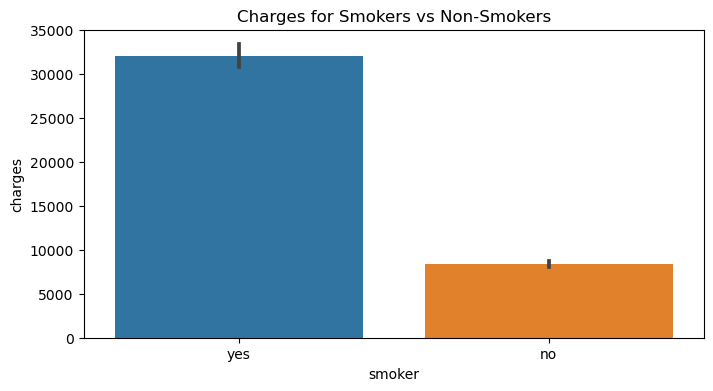

In [16]:
fig, ax = plt.subplots(figsize= (8, 4))
sns.barplot(data = df, x = 'smoker', y = 'charges')
plt.title('Charges for Smokers vs Non-Smokers');

#### we can see there is higher charges for the smoker group than the non smoker group

# - Q2. Are men more likely to smoke than women?


## Null Hypothesis: No relationship between gender and if a person smokes

## Alternate Hypothesis : There is a relationship between a persons gender and if they smoke

## Alpha = 5 %

In [19]:
display(df['sex'].value_counts())
display(df['sex'].info())
display(df['smoker'].info)

male      676
female    662
Name: sex, dtype: int64

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
1338 non-null   object
dtypes: object(1)
memory usage: 10.6+ KB


None

<bound method Series.info of 0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object>

## Since the target data is categorical and there are 2 groups to compare, we will use CHI Square test

## We will test the assumptions for chi-square test

### Executing the selected test

In [20]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [21]:
# running the Chi-Square test and save the output
resultchi = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = resultchi

In [22]:
# p-value
print(p)
p < 0.05

0.006548143503580696


True

#### Since P-Value < 5% Alpha we reject the null hypothesis since we have a significant result.  

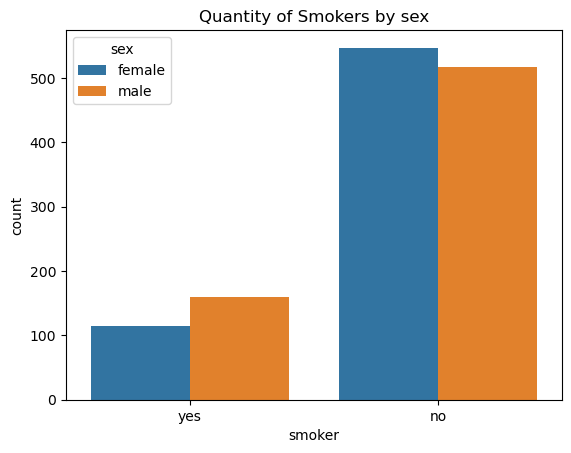

In [23]:
ax = sns.countplot(data = df, x = 'smoker', hue = 'sex')
ax.set_title("Quantity of Smokers by sex");

#### According to the countplot above, we can see that Males are more likely to smoke than females

# - Q3. Do different regions have different charges, on average?

## Null Hypothesis: The regions charges means are the same, no significance between all the regions

## Alternate Hypothesis : The regions charges means are different, there is significance

## Alpha = 5 %

In [25]:
display(df['region'].dtype)
display(df['region'].value_counts())

display(df['charges'].dtype)
display(df['charges'].info())

dtype('O')

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

dtype('float64')

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


None

## There are 4 regions and the target data is numerica we will use ANOVA Test

## We will test the assumpions of ANOVA test

In [27]:
## Create groups dictionary
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### Testing for outliers

In [29]:
# check for outliers
for i, data in groups.items():
    zscores3 = stats.zscore(data)
    outliers3 = abs(zscores3) > 3
    print(np.sum(outliers3))
    # remove outliers
    nonsmoker_charges = nonsmoker_charges[(np.abs(stats.zscore(nonsmoker_charges)) < 3)]

8
2
7
4


In [30]:
# removing outliers
for i, data in groups.items():
    data = data[(np.abs(stats.zscore(data)) < 3)]

### Testing for normality

In [31]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                       'p':p,
                       'test stat':stat}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [32]:
# check significance with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


#### We can see that the P-Value < 5% Alpha for all regions, that means there is statistical significance , but we can also see that all group sizes are greater than 15 we can ignore the normality assuption

### Testing for equal variance

In [33]:

stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

#### P-Value < 5% Alpha, there is significance between the samples

### Executing the selected test

In [34]:
resultexe = stats.kruskal(*groups.values())
resultexe

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

### P-Value > 5% Alpha, we do not reject null hypothesis, we conclude that the chargest are not significantly different between the regions

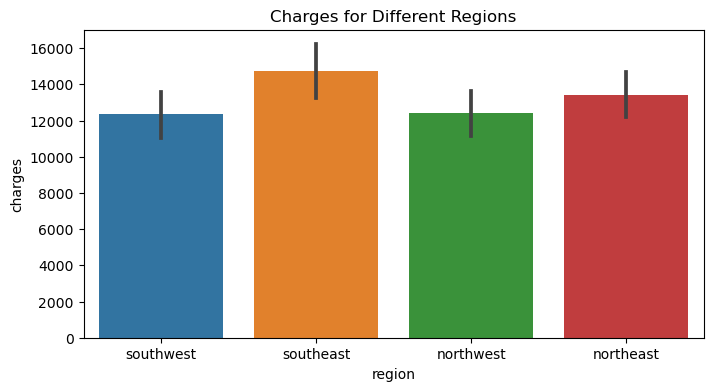

In [35]:
fig, ax = plt.subplots(figsize= (8, 4))
sns.barplot(data = df, x = 'region', y = 'charges')
plt.title('Charges for Different Regions');